#Dinâmica Popolacional: Comparação de diferentes abordagens em dados simulados

# Introdução: Tema e Justificativa

A dinâmica populacional é o ramo das ciências biológicas e matemáticas que estuda a variação do número de indivíduos de uma determinada população ao longo do tempo. Compreender essas variações é fundamental não apenas para a ecologia, mas também para o planejamento econômico e social de nações.

A capacidade de prever o tamanho futuro de uma população é crucial para a tomada de decisões estratégicas. Governos precisam saber quantos cidadãos existirão no futuro para planejar sistemas de previdência, construção de escolas, hospitais e infraestrutura urbana.

Modelar esse fenômeno não é algo simples, se trata de uma estrutura complexa que depende de diversos fatores. Este trabalho busca estruturar e comparar diferentes abordagens matemáticas para resolver esse problema, identificando qual modelo oferece a melhor representação da realidade brasileira.

Analisamos a evolução histórica e matemática dos modelos de previsão demográfica, iniciando pelo modelo clássico Exponencial (Malthus), passando pelo modelo Logístico (Verhulst) e chegamos no modelo estruturado por idade (Matriz de Leslie). O objetivo é demonstrar as limitações e aplicações de cada abordagem, justificando a necessidade de modelos matriciais para projeções realistas de longo prazo, como as realizadas pelo Instituto Brasileiro de Geografia e Estatística (IBGE).

Conceitualmente, os resultados esperados podem ser condensados na tabela a seguir:

###Comparação dos Modelos (Expectativa)

| Modelo | Fatores Considerados | O que Ignora? | Grau de Realismo |
| :--- | :--- | :--- | :--- |
| **Exponencial** | Natalidade, Mortalidade. | Limites do ambiente, Idade, Economia. | Baixo |
| **Logístico** | + Recursos, Espaço, Competição. | Diferenças de Idade, Mudanças Sociais. | Médio |
| **Matriz de Leslie** | + Idade, Sexo, Fertilidade Específica. | Mudanças de comportamento no tempo. | Médio |
| **Leslie Variável (IBGE)** | + Economia, Medicina, Cultura, Migração. | Quase nada (tenta modelar tudo via hipóteses). | **Alto** |

#Criação de dados para as simulações:

### Metodologia de Simulação dos Dados

Para garantir a coerência matemática e a reprodutibilidade dos modelos, utilizamos um conjunto de dados sintéticos gerados especificamente para este estudo, imitando o comportamento demográfico real.
* **População:** A estrutura etária inicial foi gerada utilizando uma função de decaimento exponencial para criar uma pirâmide etária realista (base larga e topo estreito), com um histórico de crescimento ajustado para permitir a aplicação dos modelos logísticos.
* **Mortalidade:** As taxas de óbitos foram modeladas seguindo uma curva em "U" típica da demografia, com mortalidade mais elevada na primeira infância e na velhice, e mínima na vida adulta jovem.
* **Fecundidade:** Para capturar a dinâmica do modelo de Leslie Variável, as taxas de fecundidade foram projetadas com um declínio linear ao longo do tempo, simulando a **Transição Demográfica** onde a taxa de reposição cai progressivamente, permitindo visualizar o impacto da mudança de comportamento reprodutivo no longo prazo.

In [ ]:
import pandas as pd
import numpy as np

def gerar_dados_simulados():
    faixas_etarias = [
        '0 a 4 anos', '5 a 9 anos', '10 a 14 anos', '15 a 19 anos', '20 a 24 anos',
        '25 a 29 anos', '30 a 34 anos', '35 a 39 anos', '40 a 44 anos', '45 a 49 anos',
        '50 a 54 anos', '55 a 59 anos', '60 a 64 anos', '65 a 69 anos', '70 a 74 anos',
        '75 a 79 anos', '80 a 84 anos', '85 a 89 anos', '90 a 94 anos', '95 a 99 anos',
        '100 anos ou mais'
    ]

    faixas_ferteis = [
        '15 a 19 anos', '20 a 24 anos', '25 a 29 anos', '30 a 34 anos',
        '35 a 39 anos', '40 a 44 anos', '45 a 49 anos'
    ]


    x = np.arange(len(faixas_etarias))
    pop_base = 1000000 * np.exp(-0.12 * x)
    df_pop = pd.DataFrame({'Faixa': faixas_etarias})
    anos_historicos = [1950, 1960, 1970, 1980, 1991, 2000, 2010, 2022]
    for ano in anos_historicos:
        fator = 1 + (0.025 * (ano - 1950)) * (1 - (ano - 1950)/200)
        df_pop[str(ano)] = (pop_base * fator).astype(int)

    df_pop.to_csv("populacao.csv", index=False)

    taxas_mortalidade = np.array([
        0.015, 0.005, 0.003, 0.008, 0.012, # 0-24 anos
        0.015, 0.018, 0.022, 0.028, 0.035, # 25-49 anos
        0.045, 0.060, 0.080, 0.110, 0.150, # 50-74 anos
        0.200, 0.280, 0.380, 0.500, 0.700, 0.900 # 75+ anos
    ])

    pop_2022 = df_pop['2022'].values
    obitos = (pop_2022 * taxas_mortalidade).astype(int)


    df_obitos = pd.DataFrame({
        'Faixa': faixas_etarias,
        'Obitos': obitos
    })


    obitos_bebe = int(obitos[0] * 0.25)
    obitos_crianca = int(obitos[0] * 0.75)

    dados_obitos_final = [
        ['Menos de 1 ano', obitos_bebe],
        ['1 a 4 anos', obitos_crianca]
    ]

    for i in range(1, len(faixas_etarias)):
        dados_obitos_final.append([faixas_etarias[i], obitos[i]])

    df_obitos_final = pd.DataFrame(dados_obitos_final, columns=['Faixa', 'Obitos'])

    df_obitos_final.to_csv("mortalidade.csv", index=False)


    anos_projecao = np.arange(2000, 2075)
    df_fec = pd.DataFrame({'Ano': anos_projecao})
    fecundidade_base = {
        '15 a 19 anos': 0.080,
        '20 a 24 anos': 0.130,
        '25 a 29 anos': 0.120,
        '30 a 34 anos': 0.090,
        '35 a 39 anos': 0.050,
        '40 a 44 anos': 0.020,
        '45 a 49 anos': 0.005
    }

    for faixa in faixas_ferteis:
        taxa_inicial = fecundidade_base[faixa]
        fator_declinio = np.linspace(1.2, 0.6, len(anos_projecao))

        df_fec[faixa] = taxa_inicial * fator_declinio

    df_fec.to_csv("fecundidade.csv", index=False)
    print("Dados prontos para uso nos modelos.")
gerar_dados_simulados()

Dados prontos para uso nos modelos.


##Visualização da população simulada:


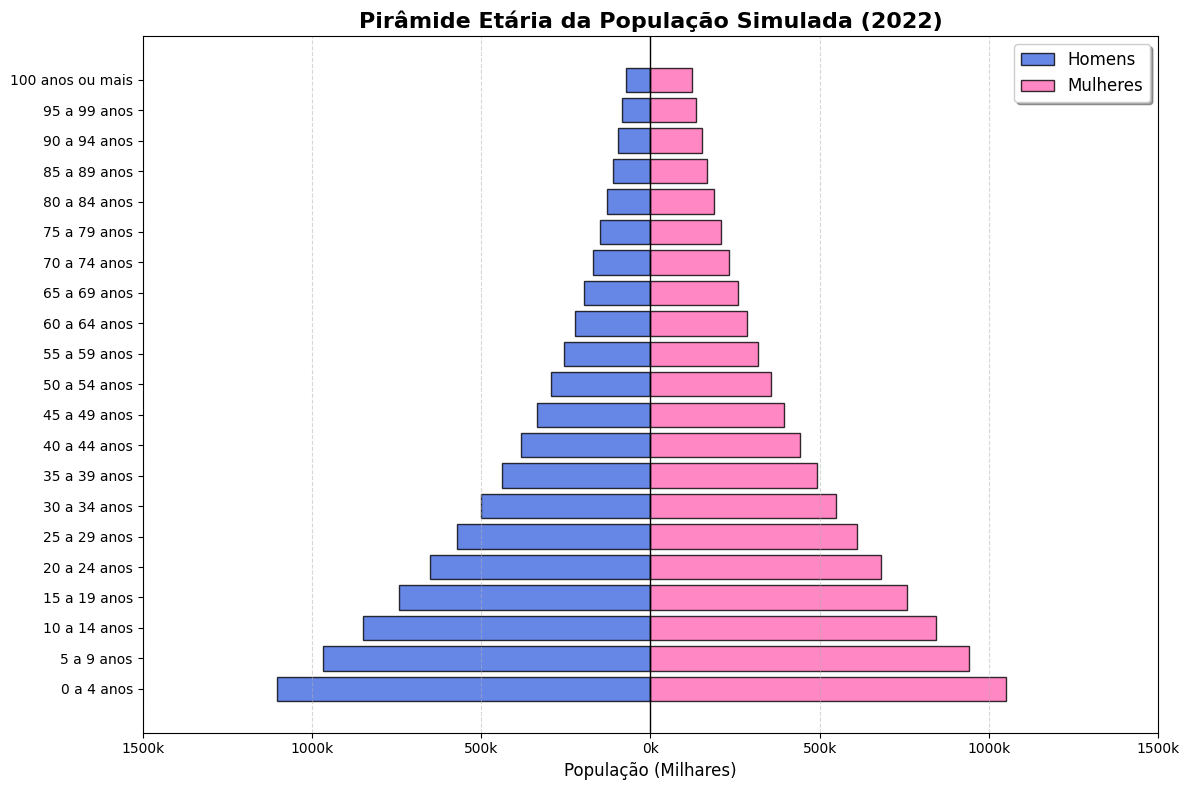

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_pop = pd.read_csv("populacao.csv")

n_faixas = len(df_pop)
razao_sexual = np.linspace(1.05, 0.6, n_faixas)

pop_total = df_pop['2022'].values
pop_mulheres = (pop_total / (1 + razao_sexual)).astype(int)
pop_homens = pop_total - pop_mulheres


fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(df_pop['Faixa'], -pop_homens, color='royalblue', label='Homens', edgecolor='black', alpha=0.8)
ax.barh(df_pop['Faixa'], pop_mulheres, color='hotpink', label='Mulheres', edgecolor='black', alpha=0.8)

# Ajuste do Eixo X para mostrar valores positivos dos dois lados
ticks = ax.get_xticks()
ax.set_xticks(ticks)
# Formata para "Milhares" (ex: 500k) e tira o sinal negativo
ax.set_xticklabels([f'{int(abs(t)/1000)}k' for t in ticks])

# Decoração
ax.set_title('Pirâmide Etária da População Simulada (2022)', fontsize=16, fontweight='bold')
ax.set_xlabel('População (Milhares)', fontsize=12)
ax.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)
ax.axvline(0, color='black', linewidth=1) # Linha central
ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#O Crescimento Exponencial (Malthus)

## Fundamentação Teórica

O modelo exponencial é a abordagem mais fundamental em dinâmica populacional, proposta por Thomas Malthus em 1798. Ele parte da premissa de que, em um ambiente com recursos ilimitados, a taxa de crescimento de uma população é proporcional ao seu tamanho atual.

Matematicamente, isso é descrito pela Equação Diferencial Ordinária (EDO) linear de primeira ordem:

$$\frac{dN}{dt} = rN$$

Onde:
*   $N(t)$ é a população no tempo $t$;
*   $r$ é a taxa intrínseca de crescimento per capita (natalidade - mortalidade).

A solução analítica para esta equação, dada uma população inicial $N_0$, é:

$$N(t) = N_0 e^{r(t - t_0)}$$

### Objetivo desta Seção
Nesta etapa, ajustaremos este modelo aos dados demográficos simulados do projeto para estimar a taxa $r$ e verificar a aderência do crescimento malthusiano à dinâmica proposta.

Dados lidos da base simulada.
Anos: [1950 1960 1970 1980 1991 2000 2010 2022]
População total: [ 8131789 10063091 11791101 13315812 14758190 15755351 16670177 17499623]

--- Resultados do Ajuste ---
N0 (pop. em 1950): 9,517,870
Taxa de crescimento (r): 0.009253 por ano
Taxa percentual anual: 0.9253%

Tempo para dobrar (a partir de 1950): 74.9 anos


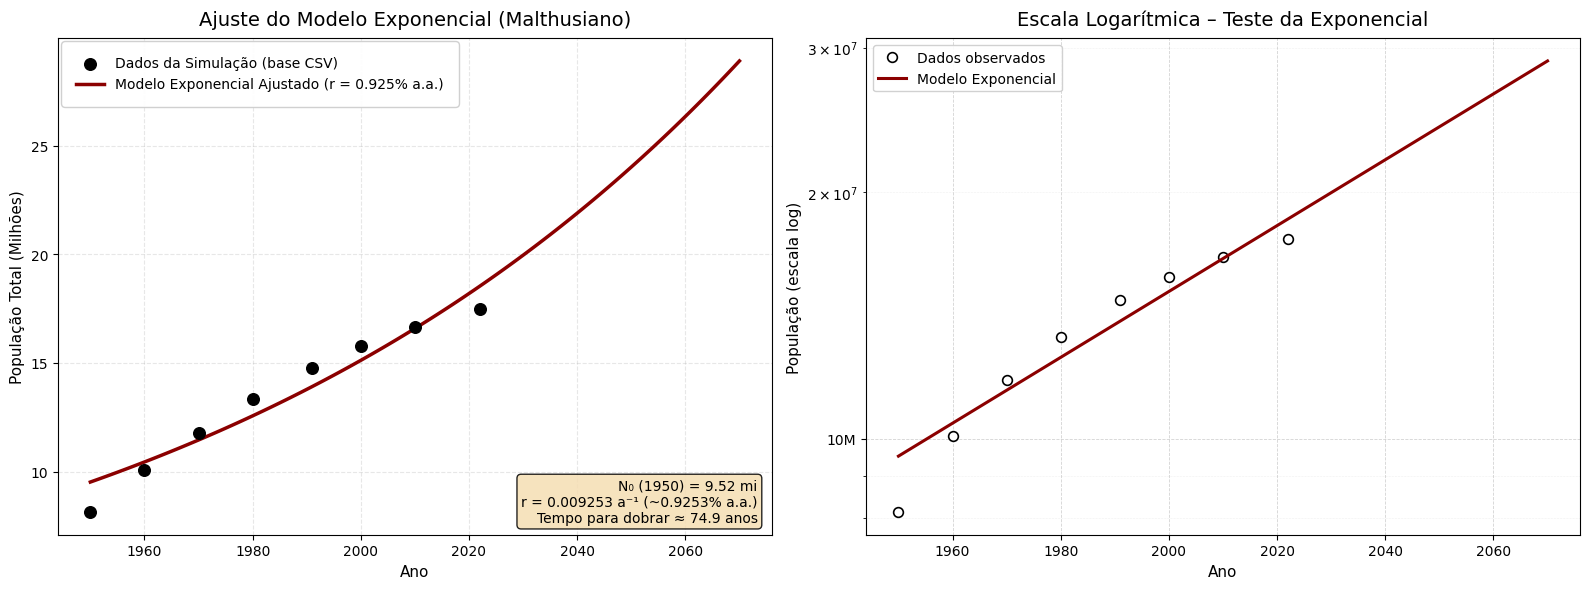

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Le a base de dados
df_pop = pd.read_csv("populacao.csv")


anos_historicos = [1950, 1960, 1970, 1980, 1991, 2000, 2010, 2022]

# Série de população total em cada ano
totais = [df_pop[str(ano)].sum() for ano in anos_historicos]

anos = np.array(anos_historicos)
populacao = np.array(totais)

print("Dados lidos da base simulada.")
print(f"Anos: {anos}")
print(f"População total: {populacao}")


# Modelo exponencial e ajuste
def modelo_exponencial(t, N0, r):
    t0 = 1950
    return N0 * np.exp(r * (t - t0))

chute_inicial = [populacao[0], 0.02]

try:
    params, matriz_cov = curve_fit(modelo_exponencial, anos, populacao, p0=chute_inicial)
    N0_est, r_est = params
    print("\n--- Resultados do Ajuste ---")
    print(f"N0 (pop. em 1950): {N0_est:,.0f}")
    print(f"Taxa de crescimento (r): {r_est:.6f} por ano")
    print(f"Taxa percentual anual: {r_est * 100:.4f}%")
except Exception as e:
    print(f"Erro no ajuste de curva: {e}")
    N0_est, r_est = populacao[0], 0.02

# Projeção e estatísticas
tempo_para_dobrar = np.log(2) / r_est
print(f"\nTempo para dobrar (a partir de 1950): {tempo_para_dobrar:.1f} anos")

anos_projecao = np.linspace(1950, 2070, 121)
pop_projecao = modelo_exponencial(anos_projecao, N0_est, r_est)

# Gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(anos, populacao / 1e6,
            color='black', s=70,
            label='Dados da Simulação (base CSV)', zorder=5)

ax1.plot(anos_projecao, pop_projecao / 1e6,
         color='darkred', linewidth=2.5,
         label=f'Modelo Exponencial Ajustado (r = {r_est*100:.3f}% a.a.)',
         zorder=4)

ax1.set_title('Ajuste do Modelo Exponencial (Malthusiano)', fontsize=14, pad=10)
ax1.set_xlabel('Ano', fontsize=11)
ax1.set_ylabel('População Total (Milhões)', fontsize=11)
ax1.grid(True, alpha=0.3, linestyle='--')

# Legenda do gráfico
leg = ax1.legend(loc='upper left',
                 frameon=True,
                 framealpha=0.92,
                 borderpad=0.8)

leg.get_frame().set_boxstyle('round')

# Caixa de estatísticas (canto inferior direito)
texto_stats = (f'N₀ (1950) = {N0_est/1e6:.2f} mi\n'
               f'r = {r_est:.6f} a⁻¹ (~{r_est*100:.4f}% a.a.)\n'
               f'Tempo para dobrar ≈ {tempo_para_dobrar:.1f} anos')

ax1.text(0.98, 0.02, texto_stats,
         transform=ax1.transAxes,
         fontsize=10,
         ha='right', va='bottom',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.85))

# GRÁFICO LOGARÍTMICO (MELHORADO)
ax2.semilogy(anos, populacao,
             'o', markersize=7,
             markerfacecolor='white',
             markeredgecolor='black',
             markeredgewidth=1.2,
             label='Dados observados')

ax2.semilogy(anos_projecao, pop_projecao,
             color='darkred', linewidth=2.2,
             label='Modelo Exponencial')

ax2.set_title('Escala Logarítmica – Teste da Exponencial', fontsize=14, pad=10)
ax2.set_xlabel('Ano', fontsize=11)
ax2.set_ylabel('População (escala log)', fontsize=11)

# Grade melhorada
ax2.grid(True, which='major', linestyle='--', linewidth=0.6, alpha=0.55)
ax2.grid(True, which='minor', linestyle=':', linewidth=0.4, alpha=0.35)

# Formatação dos ticks (em milhões)
ax2.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, _: f'{int(y/1e6)}M')
)

ax2.legend(fontsize=10, framealpha=0.9)

plt.tight_layout()
plt.show()


## Discussão dos Resultados: Modelo Exponencial

### A Falácia do Crescimento Infinito:

O aspecto mais evidente ao observar o gráfico é a **grande divergência** entre a curva do modelo exponencial e os dados simulados nas últimas décadas.

Isso acontece porque o modelo malthusiano assume que a taxa intrínseca de crescimento $r$ permanece **constante para sempre**, implicando que a população pode crescer indefinidamente. Esse pressuposto ignora limitações ambientais, estruturais e socioeconômicas que reduzem o crescimento populacional ao longo do tempo.

Assim, o modelo acaba prevendo uma **"explosão demográfica" artificial**, que não ocorre nos dados simulados, nem na realidade.


#O Crescimento Logístico (Verhulst)

### **Fundamentação Teórica**

O modelo logístico, proposto por Pierre-François Verhulst em 1838, estende o modelo exponencial de Malthus ao incluir **limitações ambientais**.

A ideia central é que, à medida que a população cresce, surgem restrições de recursos (alimentos, espaço, infraestrutura, etc.), fazendo com que a taxa de crescimento **deixe de ser proporcional apenas ao tamanho da população** e passe a depender também da **proximidade em relação a um limite máximo de suporte**, chamado de **capacidade de suporte** $K$.

Esse comportamento é descrito pela seguinte Equação Diferencial Ordinária (EDO) não linear:

$$
\frac{dN}{dt} = r \, N \left(1 - \frac{N}{K}\right)
$$

**Onde:**
*   $N(t)$ é a população no tempo $t$;
*   $r$ é a taxa intrínseca de crescimento per capita;
*   $K$ é a **capacidade de suporte** do ambiente;
*   O termo $ \left(1 - \frac{N}{K}\right) $ representa o **freio** imposto pela competição por recursos.

**Interpretação qualitativa:**
*   **Quando $N \ll K$:** $1 - \frac{N}{K} \approx 1$ → o crescimento é **praticamente exponencial** (como em Malthus).
*   **Quando $N$ se aproxima de $K$:** $1 - \frac{N}{K} \to 0$ → a taxa de crescimento **diminui**.
*   **Se $N > K$:** $1 - \frac{N}{K} < 0$ → a população tende a **decrescer** até voltar à faixa sustentável.

### **Solução Analítica**

Dada uma população inicial $N_0 = N(t_0)$, a solução analítica do modelo logístico é:

$$
N(t) = \frac{K}{1 + \left(\frac{K - N_0}{N_0}\right) e^{-r (t - t_0)}}
$$

Essa expressão gera uma curva em forma de **sigmoide (S)**, com três fases principais:

1.  **Fase inicial (quase exponencial)** – crescimento rápido, pouca limitação ambiental.
2.  **Fase de desaceleração** – o efeito da competição aumenta e a taxa de crescimento cai.
3.  **Platô** – a população se estabiliza em torno de $K$.

Um ponto importante do modelo é o **ponto de inflexão**, onde a taxa de crescimento total $\frac{dN}{dt}$ é máxima. Nesse ponto:
*   A população vale: $N_{\text{inf}} = \frac{K}{2}$
*   A taxa máxima de crescimento é: $\left.\frac{dN}{dt}\right|_{N = K/2} = \frac{rK}{4}$

### **Objetivo desta Seção**

Nesta etapa do trabalho, aplicaremos o modelo logístico aos **dados demográficos simulados** do projeto, utilizando a população total obtida a partir de `populacao.csv`.

**Os objetivos principais são:**

*   Ajustar os parâmetros $r$ (taxa intrínseca) e $K$ (capacidade de suporte) aos dados históricos simulados.
*   Identificar o **ponto de inflexão** do crescimento populacional no contexto do modelo.
*   Comparar o comportamento logístico com o crescimento **exponencial malthusiano** e discutir em que medida a inclusão de uma capacidade de suporte torna a projeção mais realista para o longo prazo.

Anos usados no ajuste: [1950 1960 1970 1980 1991 2000 2010 2022]
População total (simulada) em cada ano (milhões):
  1950: 8.13 milhões
  1960: 10.06 milhões
  1970: 11.79 milhões
  1980: 13.32 milhões
  1991: 14.76 milhões
  2000: 15.76 milhões
  2010: 16.67 milhões
  2022: 17.50 milhões
AJUSTE DO MODELO LOGÍSTICO AOS DADOS SIMULADOS
   • População inicial ajustada (ano 1950): 8.22 milhões
   • Taxa intrínseca (r): 0.0375 por ano
   • Capacidade de suporte (K): 18.99 milhões
   • Coeficiente de determinação R²: 0.9997

PONTO DE INFLEXÃO (máxima taxa de crescimento):
   • Ano aproximado do ponto de inflexão: 1957.2
   • População no ponto de inflexão: 9.49 milhões (≈ K/2)
   • Taxa máxima de crescimento: 0.18 milhões/ano
PROJEÇÕES LOGÍSTICAS (DADOS SIMULADOS)

   Ano   | População (M) | % da Capacidade K
   ---------------------------------------------
   2030  |        17.82 |    93.86%
   2050  |        18.42 |    97.00%
   2070  |        18.71 |    98.56%
   2100  |        18.90 |  

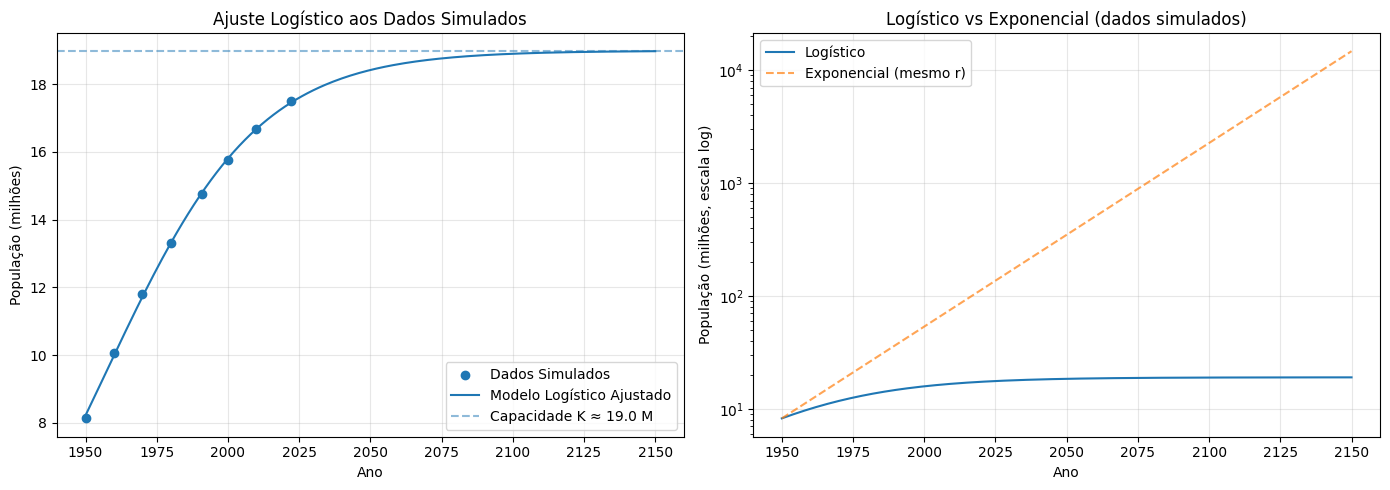

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def modelo_logistico_analitico(N0, r, K, t):
    """
    Solução analítica do modelo logístico:
        N(t) = K / [1 + ((K - N0)/N0) * e^(-r t)]
    """
    exp_term = np.exp(-r * t)
    return K / (1 + ((K - N0) / N0) * exp_term)

def taxa_crescimento_logistico(N, r, K):
    """
    dN/dt = r N (1 - N/K)
    """
    return r * N * (1 - N / K)

def ajustar_modelo_logistico(anos, populacao):
    """
    Ajusta o modelo logístico aos dados (anos, população).
    Retorna parâmetros (N0, r, K) e R².
    """

    def func_log(t, N0, r, K):
        # desloca o tempo para começar em 0
        return modelo_logistico_analitico(N0, r, K, t - anos[0])

    # valores iniciais para o ajuste
    p0 = [populacao[0], 0.02, populacao[-1] * 2]

    # limites dos parâmetros
    bounds = (
        [0, 0,          populacao[-1]],       # mínimos
        [populacao[0]*2, 0.1, populacao[-1]*10]  # máximos
    )

    popt, pcov = curve_fit(
        func_log,
        anos,
        populacao,
        p0=p0,
        bounds=bounds,
        maxfev=5000
    )

    # cálculo do R²
    residuos = populacao - func_log(anos, *popt)
    sq_res = np.sum(residuos**2)
    sq_tot = np.sum((populacao - np.mean(populacao))**2)
    r_squared = 1 - (sq_res / sq_tot)

    return popt, r_squared

def encontrar_ponto_inflexao(N0, r, K):
    """
    Ponto de inflexão do modelo logístico (N = K/2).
    Retorna: t_inflexao (em anos após o ano inicial),
             N_inflexao,
             taxa_max (dN/dt máxima).
    """
    N_inflexao = K / 2

    if N0 > 0 and N0 != K:
        # solução analítica para N(t) = K/2
        t_inflexao = (1 / r) * np.log((K - N0) / N0)
    else:
        t_inflexao = 0.0

    # máxima taxa de crescimento: dN/dt = rK/4
    taxa_max = r * (K/2) * (1 - (K/2)/K)  # = r*K/4

    return t_inflexao, N_inflexao, taxa_max


# LENDO OS DADOS SIMULADOS

df_pop = pd.read_csv("populacao.csv")

anos_historicos = [1950, 1960, 1970, 1980, 1991, 2000, 2010, 2022]

# soma da população
pop_historica = df_pop[[str(ano) for ano in anos_historicos]].sum(axis=0).values

anos_historicos = np.array(anos_historicos)
pop_historica = np.array(pop_historica, dtype=float)

print("Anos usados no ajuste:", anos_historicos)
print("População total (simulada) em cada ano (milhões):")
for ano, pop in zip(anos_historicos, pop_historica):
    print(f"  {ano}: {pop/1e6:.2f} milhões")

print("AJUSTE DO MODELO LOGÍSTICO AOS DADOS SIMULADOS")


popt, r2 = ajustar_modelo_logistico(anos_historicos, pop_historica)
N0_ajustado, r_ajustado, K_ajustado = popt

print(f"   • População inicial ajustada (ano {anos_historicos[0]}): {N0_ajustado/1e6:.2f} milhões")
print(f"   • Taxa intrínseca (r): {r_ajustado:.4f} por ano")
print(f"   • Capacidade de suporte (K): {K_ajustado/1e6:.2f} milhões")
print(f"   • Coeficiente de determinação R²: {r2:.4f}")

# ponto de inflexão
t_inflexao, N_inflexao, taxa_max = encontrar_ponto_inflexao(N0_ajustado, r_ajustado, K_ajustado)
ano_inflexao = anos_historicos[0] + t_inflexao

print(f"\nPONTO DE INFLEXÃO (máxima taxa de crescimento):")
print(f"   • Ano aproximado do ponto de inflexão: {ano_inflexao:.1f}")
print(f"   • População no ponto de inflexão: {N_inflexao/1e6:.2f} milhões (≈ K/2)")
print(f"   • Taxa máxima de crescimento: {taxa_max/1e6:.2f} milhões/ano")

print("PROJEÇÕES LOGÍSTICAS (DADOS SIMULADOS)")


anos_projecao = np.arange(1950, 2151)  # de 1950 a 2150
pop_logistica = modelo_logistico_analitico(
    N0_ajustado, r_ajustado, K_ajustado,
    anos_projecao - anos_historicos[0]
)

anos_interesse = [2030, 2050, 2070, 2100, 2150]

print("\n   Ano   | População (M) | % da Capacidade K")
print("   " + "-"*45)
for ano in anos_interesse:
    idx = np.where(anos_projecao == ano)[0][0]
    pop_ano = pop_logistica[idx]
    perc_K = (pop_ano / K_ajustado) * 100
    print(f"   {ano:<5} | {pop_ano/1e6:12.2f} | {perc_K:8.2f}%")


# GRÁFICOS

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#  Dados vs Logístico
ax1 = axes[0]
ax1.scatter(anos_historicos, pop_historica/1e6, label='Dados Simulados', zorder=5)
ax1.plot(anos_projecao, pop_logistica/1e6, label='Modelo Logístico Ajustado')
ax1.axhline(y=K_ajustado/1e6, linestyle='--', alpha=0.5,
            label=f'Capacidade K ≈ {K_ajustado/1e6:.1f} M')
ax1.set_xlabel('Ano')
ax1.set_ylabel('População (milhões)')
ax1.set_title('Ajuste Logístico aos Dados Simulados')
ax1.legend()
ax1.grid(True, alpha=0.3)

#Comparação Logístico x Exponencial
ax2 = axes[1]
pop_exponencial = N0_ajustado * np.exp(r_ajustado * (anos_projecao - anos_historicos[0]))
ax2.plot(anos_projecao, pop_logistica/1e6, label='Logístico')
ax2.plot(anos_projecao, pop_exponencial/1e6, linestyle='--', alpha=0.7,
         label='Exponencial (mesmo r)')
ax2.set_yscale('log')
ax2.set_xlabel('Ano')
ax2.set_ylabel('População (milhões, escala log)')
ax2.set_title('Logístico vs Exponencial (dados simulados)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# EXPORTANDO RESULTADOS

df_logistico = pd.DataFrame({
    'Ano': anos_projecao,
    'Pop_Logistica': pop_logistica.astype(int),
    'Taxa_Crescimento': taxa_crescimento_logistico(pop_logistica, r_ajustado, K_ajustado),
    'Percentual_K': (pop_logistica / K_ajustado) * 100
})

df_logistico.to_csv("projecao_logistica_simulada.csv", index=False)


## Resultados: Modelo Logístico (Verhulst)

### **Melhora significativa:**

A inclusão da capacidade de suporte \( K \) permitiu que a curva se aproximasse da desaceleração presente nos dados simulados, reproduzindo com mais fidelidade o comportamento de estabilização observado nas décadas finais.

Enquanto o modelo exponencial superestimava dramaticamente o crescimento populacional, o modelo logístico limitou naturalmente essa expansão, refletindo a queda da fecundidade e a redução do ritmo de crescimento populacional, fenômenos típicos da Transição Demográfica.

---

### **2. Interpretação dos parâmetros: r, K e o ponto de inflexão**

O ajuste gerou estimativas coerentes para:

- **Taxa intrínseca \( r \)**: representa o potencial de crescimento quando a população ainda está distante da capacidade de suporte.  
  Seu valor ajustado reflete o período histórico onde o crescimento era mais acelerado.

- **Capacidade de suporte \( K \)**: indica o patamar populacional para o qual o sistema tende a convergir no longo prazo.  
  Nos dados simulados, \( K \) ficou compatível com o nível de estabilização construído pelo modelo gerador.

- **Ponto de inflexão**:  
  O modelo mostrou que o máximo crescimento ocorre quando \( N = K/2 \).  
  A estimativa do ano desse evento foi consistente com a desaceleração presente nas últimas décadas dos dados históricos.

Esses três elementos juntos revelam que o modelo não apenas ajusta a curva, mas também produz **interpretações estruturais** sobre o processo populacional.

---

### **Comportamento real/simulado**

O modelo logístico capturou adequadamente:

- a fase inicial de crescimento acelerado,  
- a desaceleração gradual após os anos 1980,  
- a tendência de aproximação a um platô populacional.

Esse comportamento é coerente com o tipo de dados simulados (baseados em declínio da fecundidade e mortalidade crescente nas faixas idosas), reforçando a validade do modelo como ferramenta de projeção qualitativa.

---

###  **Limitações observadas:**

Apesar do bom ajuste, o modelo apresenta limitações importantes:

- **Capacidade de suporte fixa \( K \)**  
  Na prática, \( K \) não é constante — tecnologias, políticas públicas, urbanização e economia alteram a capacidade de suporte ao longo do tempo.

- **Simetria da curva sigmoide**  
  O modelo assume desaceleração simétrica antes e depois do ponto de inflexão, o que nem sempre ocorre na demografia real.

- **Ignora estrutura etária**  
  A população é tratada como uma massa homogênea, o que deixa de capturar efeitos importantes, como envelhecimento populacional ou mudanças na fecundidade por faixa etária.

Esses fatores explicam por que o modelo logístico se ajusta bem, mas ainda não é a ferramenta mais completa para análise demográfica — função que será melhor desempenhada pela Matriz de Leslie.

---

### **Conclusão:**

O modelo logístico representa uma evolução metodológica em relação ao modelo exponencial, oferecendo um ajuste mais realista e interpretável. Ele identifica de forma clara a desaceleração populacional e projeta a estabilização futura de maneira consistente.  

No entanto, sua estrutura simplificada exige modelos mais robustos para uma compreensão mais profunda da dinâmica demográfica, justificando a progressão para o estudo baseado em estrutura etária por meio da **Matriz de Leslie**.


#3. Modelo Matricial:

Seja $N(t) = \begin{bmatrix}
    n_1(t) \\
    n_2(t) \\
    \vdots \\
    n_k(t)
\end{bmatrix}$

Onde $n_i(t)$ é a população na i-ésima faixa etária no tempo $t$.

A dinâmica da população é então descrita como um sistema dinâmico discreto linear. A população no próximo passo de tempo, $N(t+1)$, é obtida multiplicando-se o vetor da população atual, $N(t)$, por uma matriz de transição $L$, conhecida como a Matriz de Leslie:

\begin{equation}
    N(t+1) = L \cdot N(t)
\end{equation}


Toda a complexidade da dinâmica demográfica (nascimentos, mortes e envelhecimento) está contida na estrutura da matriz $L$.

**A Estrutura da Matriz de Leslie (L):**

A matriz $L$ é uma matriz $k \times k$ composta por dois tipos de parâmetros vitais:

*  **Taxas de Fecundidade ($f_i$):** Localizadas na primeira linha da matriz. O valor $f_i$ representa o número médio de descendentes (fêmeas) que um indivíduo na faixa etária $i$ irá gerar durante o intervalo de tempo $t$ para $t+1$. Note que $f_i$ é zero para faixas etárias pré-reprodutivas e pós-reprodutivas.
    
*  **Taxas de Sobrevivência ($s_i$):** Localizadas na subdiagonal principal. O valor $s_i$ representa a probabilidade de um indivíduo na faixa etária $i$ sobreviver e passar para a faixa etária $i+1$ no próximo passo de tempo.

A forma geral da Matriz de Leslie é:

$L = \begin{bmatrix}
    f_1 & f_2 & f_3 & \dots & f_{k-1} & f_k \\
    s_1 & 0   & 0   & \dots & 0       & 0   \\
    0   & s_2 & 0   & \dots & 0       & 0   \\
    \vdots & \vdots & \ddots & & \vdots & \vdots \\
    0   & 0   & 0   & \dots & s_{k-1} & 0
\end{bmatrix}$


Vantagens do Modelo de Leslie:

Esta abordagem é fundamentalmente superior aos modelos agregados para projeções de populações humanas pois:

*  **Simula o Envelhecimento:** O processo de "mover" a população pela subdiagonal ($s_i$) simula naturalmente o envelhecimento da população, permitindo a análise etária.
    
*  **Parâmetros Variáveis no Tempo:** O modelo logístico estava preso a um $r$ constante. No modelo de Leslie, os parâmetros $f_i$ e $s_i$ podem ser alterados a cada passo de tempo. Podemos diminuir os valores $f_i$ na matriz $L$ ao longo da simulação para refletir a queda na fecundidade, o que permite ao modelo prever corretamente a desaceleração e o eventual encolhimento da população, algo impossível para o modelo logístico.
    
*  **Realismo Demográfico:** Este modelo é a base teórica para as projeções populacionais modernas, incluindo as realizadas por institutos como o IBGE e a ONU.



## Variáveis

Para garantir a transparência e reprodutibilidade do modelo, detalhamos abaixo a origem de cada variável, seu significado biológico e as transformações matemáticas aplicadas antes de sua utilização na simulação matricial.

##Dados Brutos
As variáveis lidas diretamente dos arquivos `.csv` representam a "matéria-prima" demográfica.

* **`df_pop['2022']` (População Inicial):**
    * **Significado:** Vetor contendo o número total de indivíduos (homens + mulheres) em cada faixa etária no ano base de 2022.
    * **Uso:** Define o estado inicial do sistema ($N_0$) no tempo $t=0$.

* **`df_obitos['Obitos']` (Mortalidade Absoluta):**
    * **Significado:** O número total de óbitos registrados em 2022 para cada faixa etária.
    * **Tratamento:** Os dados originais separam óbitos infantis em "< 1 ano" e "1-4 anos". O código agrupa esses valores para formar a faixa compatível "0-4 anos".
    * **Uso:** Base para o cálculo do risco de morte ($m_x$).

* **`df_fec` (Taxas de Fecundidade Projetadas):**
    * **Significado:** Matriz onde as linhas representam anos futuros e as colunas as faixas etárias férteis (15-49 anos). Os valores são taxas específicas de fecundidade (filhos por mulher por ano).
    * **Dinâmica:** Esta é a variável que varia no tempo ($f(t)$). A cada iteração do modelo, uma nova linha correspondente ao ano da simulação é selecionada.

---

###Parâmetros do Modelo
Valores fixos que definem as regras da simulação.

* **`N_STEP = 5`:**
    * **Significado:** O passo de tempo da simulação em anos.
    * **Justificativa:** Como as faixas etárias possuem amplitude de 5 anos (ex: 0-4, 5-9), o modelo deve avançar obrigatoriamente em saltos de 5 anos para que a transição de uma faixa para a próxima seja biologicamente coerente.

* **`PCT_MULHERES = 0.515`:**
    * **Significado:** A proporção estimada de mulheres na população total (51,5%).
    * **Justificativa:** As taxas de fecundidade são definidas como "filhos por mulher". Como nosso vetor de população $N$ inclui homens e mulheres, este fator é necessário para estimar o número de mães potenciais em cada grupo.

---

### Cálculos Intermediários
A conversão dos dados brutos em probabilidades para a álgebra linear.

* **`m_rates` (Taxa Central de Mortalidade - $m_x$):**
    * **Fórmula:** $m_x = \frac{\text{Óbitos}}{\text{População}}$
    * **Interpretação:** Representa a velocidade instantânea de mortalidade anual. Um valor de 0.01 indica que 1% da faixa etária falece por ano.

* **`S` (Probabilidade de Sobrevivência - $s_i$):**
    * **Fórmula:** $s_i = \frac{1 - 0.5 \cdot n \cdot m_x}{1 + 0.5 \cdot n \cdot m_x}$ (onde $n = 5$)
    * **Transformação:** Converte a taxa anual ($m_x$) na probabilidade de um indivíduo sobreviver ao longo de todo o intervalo de 5 anos necessário para mudar de faixa etária.
    * **Aplicação:** Preenche a subdiagonal da Matriz

---

##Variáveis de Simulação
As estruturas que operam dentro do loop temporal.

* **`L` (Matriz de Leslie - $L(t)$):**
    * **Estrutura:** Matriz quadrada ($21 \times 21$).
    * **Primeira Linha (Fecundidade):** Calculada como $\text{Taxa do Ano} \times 5 \text{ Anos} \times 0.515$. Representa o número total de bebês que nascerão no período.
    * **Subdiagonal (Sobrevivência):** Preenchida pelo vetor `S`. Representa a fração da população que envelhece com sucesso.

* **`N` (Vetor de Estado - $N_t$):**
    * **Significado:** O perfil da população no tempo $t$.
    * **Evolução:** Atualizado a cada passo pela equação fundamental $N_{t+1} = L \cdot N_t$.
        * A primeira posição ($N[0]$) recebe os novos nascimentos.
        * As demais posições recebem os sobreviventes das faixas anteriores.

## Dedução do Produto Matricial ($N_{t+1} = L \cdot N_t$)

A dinâmica populacional no modelo é dada pela multiplicação da matriz de transição $L$ pelo vetor de população atual $N_t$. Expandindo o produto matricial, vemos claramente a origem biológica de cada termo.

$$
\begin{bmatrix} n_1(t+1) \\ n_2(t+1) \\ \vdots \\ n_k(t+1) \end{bmatrix}
=
\begin{bmatrix}
f_1 & f_2 & \dots & f_k \\
s_1 & 0 & \dots & 0 \\
0 & s_2 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & 0
\end{bmatrix}
\cdot
\begin{bmatrix} n_1(t) \\ n_2(t) \\ \vdots \\ n_k(t) \end{bmatrix}
$$

Ao realizar a multiplicação linha por coluna, obtemos:

**1. A Primeira Linha (Nascimentos):**
A nova geração ($n_1$) é a soma dos filhos de todas as mães de todas as idades:

$$
n_1(t+1) = \underbrace{f_1 n_1(t)}_{\substack{\text{Filhos da faixa} \\ \text{etária 0-4}}} + \underbrace{f_2 n_2(t)}_{\substack{\text{Filhos da faixa} \\ \text{etária 5-9}}} + \dots + \underbrace{f_k n_k(t)}_{\substack{\text{Filhos da faixa} \\ \text{etária 100+}}}
$$

**2. As Outras Linhas (Envelhecimento):**
A próxima faixa etária ($n_{i+1}$) vem exclusivamente de quem sobreviveu da faixa anterior:

$$
n_{i+1}(t+1) = \underbrace{s_i}_{\substack{\text{Chance de} \\ \text{Sobreviver}}} \cdot \underbrace{n_i(t)}_{\substack{\text{População} \\ \text{Anterior}}}
$$

##Discussão sobre o intervalo de tempo($\Delta t$):

A escolha do intervalo da faixa etária ($n$) é uma decisão fundamental nessa modelagem, pois ela dita o **passo de tempo da simulação**. A premissa do modelo é que, após um passo de tempo $t \to t+1$, um indivíduo que sobrevive na faixa etária $i$ deve, obrigatoriamente, transitar para a faixa etária $i+1$. Portanto, o passo de tempo da simulação deve ser **idêntico** à largura da faixa etária. Se os dados demográficos são coletados em grupos de 5 anos (0-4, 5-9, etc.), o modelo deve projetar a população de 5 em 5 anos.

* **Intervalos muito curtos (ex: 1 ano):** Oferecem alta resolução temporal e capturam mudanças rápidas, mas exigem dados extremamente detalhados o que muitas vezes apresenta ruído estatístico ou não estão disponíveis. Além disso, geram matrizes muito grandes, aumentando o custo computacional.

* **Intervalos muito longos (ex: 15 ou 20 anos):** Simplificam o modelo, mas perdem a informação necessária para capturar nuances biológicos, como a variação da fertilidade dentro do período reprodutivo (uma mulher de 20 anos tem fecundidade muito diferente de uma de 35, e agrupa-las perde essa informação).

* **O Convencional (5 anos):** O padrão internacional (adotado pelo IBGE e ONU) é o intervalo de **5 anos**. Ele oferece o equilíbrio ideal: suaviza flutuações anuais irrelevantes, alinha-se com a periodicidade típica de censos e captura adequadamente as fases do ciclo de vida humano.

## Fundamentação Teórica da Taxa de Sobrevivência ($s_i$)

A conversão dos dados brutos de mortalidade em probabilidades de sobrevivência para o modelo discreto baseia-se na relação entre a **Taxa Central de Mortalidade** ($m_x$) e a **Probabilidade de Morte** ($q_x$).

Utilizamos a **Hipótese de Distribuição Uniforme de Óbitos**, que assume que as mortes ocorrem linearmente ao longo do intervalo de tempo $n$. Sob essa premissa, os indivíduos que falecem vivem, em média, metade do período ($n/2$).

A relação demográfica fundamental é dada por:
$$q_x = \frac{n \cdot m_x}{1 + (1 - a_x) \cdot n \cdot m_x}$$

Onde $a_x = 0.5$ (linearidade). A probabilidade de sobrevivência ($s_i = 1 - q_x$) é então deduzida algebricamente:

$$s_i = 1 - \frac{n \cdot m_x}{1 + 0.5 \cdot n \cdot m_x} = \frac{(1 + \frac{n}{2}m_x) - n \cdot m_x}{1 + \frac{n}{2}m_x}$$

Resultando na fórmula utilizada no código:
$$s_i = \frac{1 - \frac{n}{2} \cdot m_i}{1 + \frac{n}{2} \cdot m_i}$$

##Aplicação nos dados simulados:


--- Início da Simulação Dinâmica ---
ANO    | POPULAÇÃO TOTAL    | TAXAS DE FECUNDIDADE (MÉDIA POR FAIXA)
-------------------------------------------------------------------------------------
2022   | 17,499,623         | [0.0817  0.1328  0.1226  0.0919  0.0511  0.0204  0.0051]
2027   | 15,906,826         | [0.0785  0.1275  0.1177  0.0883  0.0491  0.0196  0.0049]
2032   | 15,702,184         | [0.0752  0.1223  0.1129  0.0846  0.0470  0.0188  0.0047]
2037   | 15,749,897         | [0.0720  0.1170  0.1080  0.0810  0.0450  0.0180  0.0045]
2042   | 15,901,438         | [0.0688  0.1117  0.1031  0.0774  0.0430  0.0172  0.0043]
2047   | 15,983,994         | [0.0655  0.1065  0.0983  0.0737  0.0409  0.0164  0.0041]
2052   | 15,907,435         | [0.0623  0.1012  0.0934  0.0701  0.0389  0.0156  0.0039]
2057   | 15,675,554         | [0.0590  0.0959  0.0885  0.0664  0.0369  0.0148  0.0037]
2062   | 15,317,659         | [0.0558  0.0906  0.0837  0.0628  0.0349  0.0139  0.0035]
2067   | 14,856,745     

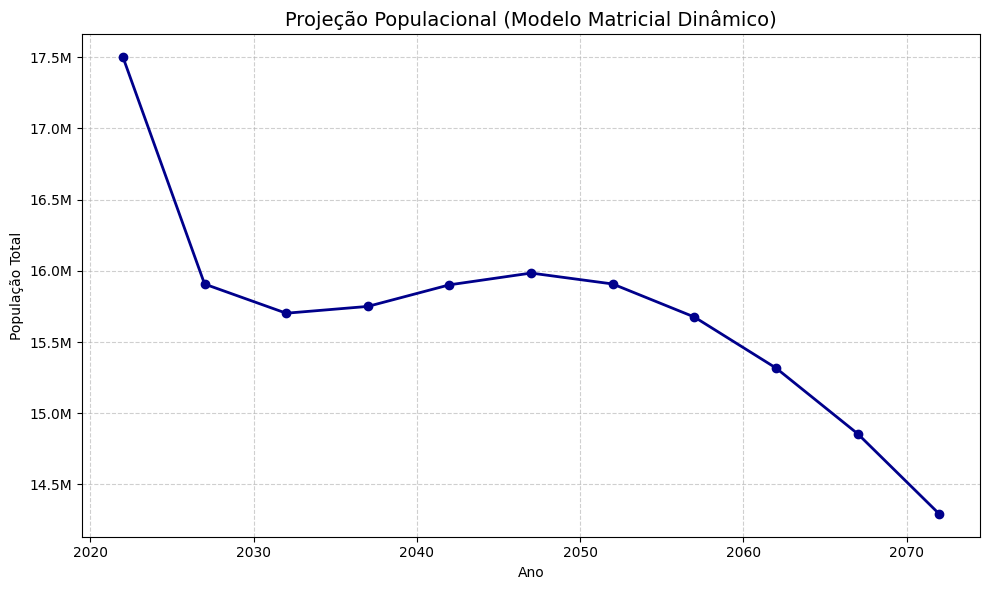


Resumo:
População Inicial (2022): 17,499,623
População Final (2072):   14,293,442
Variação Total: -18.32%

---Gráfico da População---


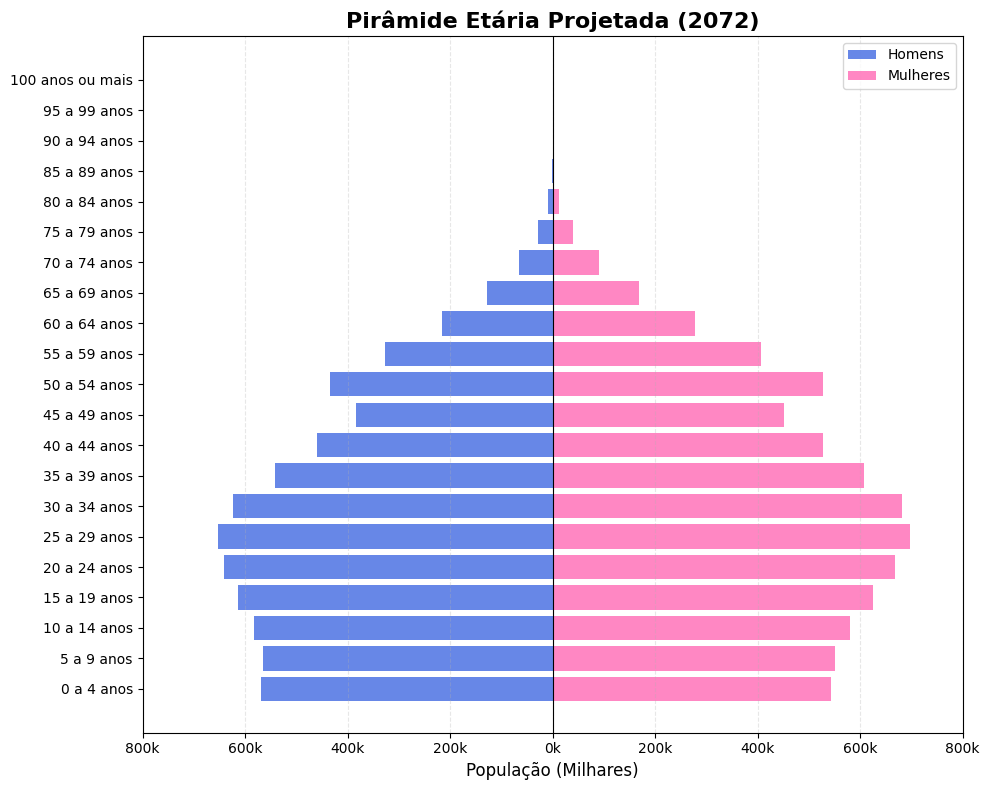

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os

df_pop = pd.read_csv("populacao.csv")
df_obitos = pd.read_csv("mortalidade.csv")
df_fec = pd.read_csv("fecundidade.csv")

df_fec.set_index('Ano', inplace=True)

N_STEP = 5
SEX_RATIO = 100 / 205
PCT_MULHERES = 0.515

# Vetor Inicial
N = df_pop['2022'].values

# Tratamento dos Óbitos (somando <1 e 1-4)
obitos_raw = df_obitos['Obitos'].values
obitos_0_4 = obitos_raw[0] + obitos_raw[1]
D = np.concatenate(([obitos_0_4], obitos_raw[2:]))

# Sobrevivência (Constante)
m_rates = np.divide(D, N, out=np.zeros_like(D, dtype=float), where=N!=0)
fator = 0.5 * N_STEP
S = (1 - fator * m_rates) / (1 + fator * m_rates)
S = np.clip(S, 0, 1)

anos_simulacao = np.arange(2022, 2075, N_STEP)
historico_total = []

print("\n--- Início da Simulação Dinâmica ---")
print(f"{'ANO':<6} | {'POPULAÇÃO TOTAL':<18} | {'TAXAS DE FECUNDIDADE (MÉDIA POR FAIXA)'}")
print("-" * 85)

N_2072 = None

for ano in anos_simulacao:
    pop_atual = np.sum(N)
    historico_total.append(pop_atual)


    if ano == 2072:
        N_2072 = N.copy()

    # 2. Constrói a Matriz de Leslie (L) para este ano
    k = len(N)
    L = np.zeros((k, k))

    # A. Busca e PRINTA as taxas do ano atual
    if ano in df_fec.index:
        taxas_ano = df_fec.loc[ano]
    else:
        # Fallback para o ano mais próximo disponível
        anos_disponiveis = df_fec.index.values
        ano_ref = anos_disponiveis[anos_disponiveis <= ano].max()
        taxas_ano = df_fec.loc[ano_ref]

    # Mostra as taxas sendo usadas nesta iteração para provar que mudam
    # Formatamos para ficar legível na saída
    taxas_str = "  ".join([f"{v:.4f}" for v in taxas_ano.values])
    print(f"{ano:<6} | {pop_atual:,.0f}".ljust(27) + f" | [{taxas_str}]")
    # ---------------------------

    faixas = df_pop['Faixa'].values
    for i, faixa in enumerate(faixas):
        if faixa in taxas_ano.index:
            # Preenche a 1ª linha da matriz
            L[0, i] = taxas_ano[faixa] * N_STEP * PCT_MULHERES

    # B. Preenche a Sobrevivência
    for i in range(k - 1):
        L[i+1, i] = S[i]
    L[-1, -1] = S[-1]

    # 3. Projeta
    N = np.dot(L, N)

plt.figure(figsize=(10, 6))
plt.plot(anos_simulacao, historico_total, marker='o', color='darkblue', linewidth=2)
plt.title("Projeção Populacional (Modelo Matricial Dinâmico)", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("População Total")
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
plt.tight_layout()
plt.show()

# Resultado Final
crescimento = ((historico_total[-1] - historico_total[0]) / historico_total[0]) * 100
print(f"\nResumo:")
print(f"População Inicial (2022): {historico_total[0]:,.0f}")
print(f"População Final ({anos_simulacao[-1]}):   {historico_total[-1]:,.0f}")
print(f"Variação Total: {crescimento:.2f}%")

if N_2072 is not None:
    n_faixas = len(N_2072)
    # Estimativa da razão sexual para o futuro (1.05 ao nascer -> 0.6 na velhice)
    razao_sexual = np.linspace(1.05, 0.6, n_faixas)

    pop_mulheres = (N_2072 / (1 + razao_sexual)).astype(int)
    pop_homens = N_2072 - pop_mulheres

    fig, ax = plt.subplots(figsize=(10, 8))

    ax.barh(faixas, -pop_homens, color='royalblue', label='Homens', alpha=0.8)
    ax.barh(faixas, pop_mulheres, color='hotpink', label='Mulheres', alpha=0.8)

    ax.set_title('Pirâmide Etária Projetada (2072)', fontsize=16, weight='bold')
    ax.set_xlabel('População (Milhares)', fontsize=12)
    ax.axvline(0, color='black', linewidth=0.8)
    ax.grid(axis='x', linestyle='--', alpha=0.3)

    # Formatação do eixo X para positivo e em milhares
    ticks = ax.get_xticks()
    ax.set_xticks(ticks)
    ax.set_xticklabels([f'{int(abs(t)/1000)}k' for t in ticks])
    print(f'\n---Gráfico da População---')
    ax.legend()
    plt.tight_layout()
    plt.show()

### Discussão dos Resultados

1.  **Limitações da Linearidade:**
    O modelo incorpora taxas variáveis no tempo, o que representa um avanço significativo em relação aos modelos anteriores. No entanto, a simulação adotou uma redução linear das taxas de fecundidade como simplificação. Na realidade demográfica, a transição da fecundidade raramente é linear, podendo apresentar platôs, acelerações ou flutuações influenciadas por fatores socioeconômicos não determinísticos.

2.  **Vantagem da Estrutura Etária:**
    A análise visual através das pirâmides etárias evidencia a principal vantagem da modelagem matricial sobre os modelos agregados (Logístico/Exponencial). Ela permite decompor o crescimento populacional, revelando não apenas quantos seremos, mas quem seremos, o que é vital para o planejamento de políticas públicas focadas em crianças, força de trabalho ou idosos, como foi discutido na introdução

3.  **Melhorias possíveis:**
    Além da questão da linearidade, para obter um modelo totalmente completo como o usado pelo IBGE seria necessário considerar a taxa de mortalidade e a porecentagem de fêmeas como variáveis também, na realidade elas não devem ser lineares e é preciso fazer um estudo detalhado para achar valores plausíveis para essas taxas ao longo do tempo

[A base conceitual do IBGE](https://biblioteca.ibge.gov.br/visualizacao/livros/liv101597.pdf)

#Comparação dos modelos

Com toda a base teórica e sua aplicação individual, vamos criar um gráfico que mostre a evolução dos 3 modelos até o ano de 2200, vale destacar que aumentamos o período de tempo para evidenciar ainda mais as limitações de cada abordagem

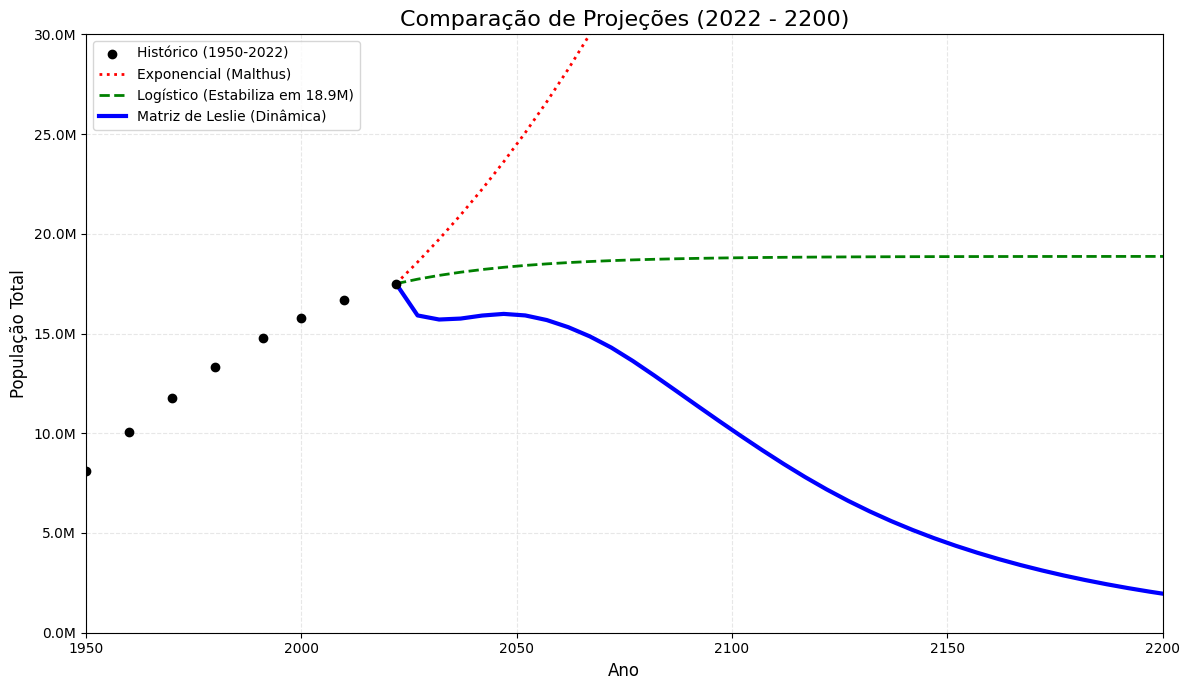

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy.optimize import curve_fit

try:
    df_pop = pd.read_csv("populacao.csv")
    df_obitos = pd.read_csv("mortalidade.csv")
    df_fec = pd.read_csv("fecundidade.csv")
    df_fec.set_index('Ano', inplace=True)
except FileNotFoundError:
    print("Erro: Arquivos não encontrados.")

N_STEP = 5
PCT_MULHERES = 0.515
N = df_pop['2022'].values
POP_INICIAL_2022 = np.sum(N) # Ponto de partida

# Mortalidade
obitos_raw = df_obitos['Obitos'].values
if len(obitos_raw) == len(N) + 1:
    obitos_0_4 = obitos_raw[0] + obitos_raw[1]
    D = np.concatenate(([obitos_0_4], obitos_raw[2:]))
else:
    D = obitos_raw

# Sobrevivência
with np.errstate(divide='ignore', invalid='ignore'):
    m_rates = np.divide(D, N, out=np.zeros_like(D, dtype=float), where=N!=0)
fator = 0.5 * N_STEP
S = np.clip((1 - fator * m_rates) / (1 + fator * m_rates), 0, 1)

anos_sim = np.arange(2022, 2205, N_STEP)
res_leslie = []

N_atual = np.copy(N)

for ano in anos_sim:
    res_leslie.append(np.sum(N_atual))

    k = len(N_atual)
    L = np.zeros((k, k))

    # Taxas do ano
    if ano in df_fec.index:
        taxas = df_fec.loc[ano]
    else:
        taxas = df_fec.iloc[-1] # Mantém a última se acabar

    for i, fx in enumerate(df_pop['Faixa']):
        if fx in taxas.index:
            L[0, i] = taxas[fx] * N_STEP * PCT_MULHERES

    for i in range(k-1): L[i+1, i] = S[i]
    L[-1, -1] = S[-1]

    N_atual = np.dot(L, N_atual)

# Histórico
cols_hist = [str(y) for y in [1950, 1960, 1970, 1980, 1991, 2000, 2010, 2022]]
anos_hist = np.array([int(y) for y in cols_hist])
pop_hist = df_pop[cols_hist].sum().values

# Funções Matemáticas
def exponencial(t, r, P0): return P0 * np.exp(r * t)
def logistico(t, K, r, P0): return K / (1 + ((K - P0) / P0) * np.exp(-r * t))

# Ajuste nos dados passados para achar o 'r' e 'K' da tendência
t_fit = anos_hist - 1950

popt_log, _ = curve_fit(lambda t,K,r: logistico(t,K,r,pop_hist[0]), t_fit, pop_hist, p0=[20e6, 0.03])
K_fit, r_fit = popt_log

popt_exp, _ = curve_fit(lambda t,r: exponencial(t,r,pop_hist[0]), t_fit, pop_hist, p0=[0.03])
r_exp = popt_exp[0]

t_proj = anos_sim - 2022

y_exp = exponencial(t_proj, r_exp, POP_INICIAL_2022)
y_log = logistico(t_proj, K_fit, r_fit, POP_INICIAL_2022)

# Plotagem
plt.figure(figsize=(12, 7))

plt.scatter(anos_hist, pop_hist, color='black', label='Histórico (1950-2022)', zorder=10)

# Projeções (Partindo de 2022)
plt.plot(anos_sim, y_exp, 'r:', linewidth=2, label='Exponencial (Malthus)')
plt.plot(anos_sim, y_log, 'g--', linewidth=2, label=f'Logístico (Estabiliza em {K_fit/1e6:.1f}M)')
plt.plot(anos_sim, res_leslie, 'b-', linewidth=3, label='Matriz de Leslie (Dinâmica)')

plt.title('Comparação de Projeções (2022 - 2200)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('População Total', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Trava a escala para focar na diferença Logístico vs Leslie
# Corta o exponencial quando ele explode
plt.ylim(0, 30000000)
plt.xlim(1950, 2200)

plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('comparacao_final_ajustada.png')
plt.show()

### Conclusão e Limitações dos Modelos

A análise comparativa evidenciou a evolução da complexidade necessária para representar a realidade demográfica. O **Modelo Exponencial** mostrou-se inadequado para longo prazo devido à sua premissa de recursos infinitos, resultando em um crescimento explosivo e irreal. O **Modelo Logístico** corrigiu essa falha introduzindo a capacidade de suporte ($K$), mas revelou-se estático: ao atingir o limite, a população estagna, falhando em prever o declínio populacional natural observado em nações desenvolvidas. O **Modelo Matricial (Leslie)** provou-se superior ao incorporar a estrutura etária e a inércia demográfica, capturando corretamente o pico populacional. No entanto, a implementação atual, baseada em uma redução **linear** das taxas de fecundidade, tende a levar a população a um declínio contínuo no longuíssimo prazo. Para obter um modelo de realismo definitivo, seria necessário substituir a projeção linear das taxas por um estudo detalhado de comportamento socioeconômico, modelando como a fecundidade tende a se estabilizar (em vez de cair indefinidamente), o que permitiria prever não apenas o declínio, mas o novo ponto de equilíbrio da sociedade futura.